# Impeller Stress and Frequency Prediction

## Polynominal Linear Regression

<h2 style="color:cyan">Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

<h2 style="color:cyan">Read Data</h2>

In [2]:
filename_train = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20stress%20and%20freq.csv'
filename_test = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20test%20data.csv'
df = pd.read_csv(filename_train)
df_test = pd.read_csv(filename_test)

<h2 style="color:cyan">Data Exploring</h2>

In [3]:
df_test.head()

,No,Model,Speed,D2,DB,tm,ts,ti,tv,Rib,...,hasRimIn,hasVaneRimIn,hasVaneRimOut,Weight,GD2,Sm,Ss,Sv,Si,Frequency
0,1,H,1.785,1.38,0.37,9,4.5,0,3.2,2,...,0,0,0,184.52,52.388,140.4,299.6,329.4,0,46.46
1,2,H,3.575,1.38,0.37,9,4.5,0,3.2,2,...,0,0,0,184.52,52.388,0.0,0.0,0.0,0,69.16
2,3,H,1.185,1.38,0.37,9,4.5,0,3.2,2,...,0,0,0,184.52,52.388,0.0,0.0,0.0,0,40.77
3,4,H,1.785,1.38,0.37,12,6.0,0,4.5,2,...,0,0,0,248.86,70.660,143.3,275.8,288.3,0,49.48
4,5,H,1.785,1.38,0.37,12,4.5,0,3.2,2,...,1,0,0,218.13,61.217,134.8,247.0,322.7,0,50.36


In [4]:
df.head()

,No,Model,Speed,D2,DB,tm,ts,ti,tv,Rib,...,hasRimIn,hasVaneRimIn,hasVaneRimOut,Weight,GD2,Sm,Ss,Sv,Si,Frequency
0,1,H,3.575,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,46.6831,4.105,216.6,292.3,294.5,0,100.46
1,2,H,1.785,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,46.6831,4.105,53.9,72.9,73.5,0,86.74
2,3,H,1.185,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,46.6831,4.105,23.8,32.1,32.4,0,83.93
3,4,H,0.890,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,46.6831,4.105,13.4,18.1,18.2,0,82.90
4,5,H,1.785,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,46.6831,4.105,54.5,73.6,74.2,0,86.35


In [5]:
df.dtypes

No                  int64
Model              object
Speed             float64
D2                float64
DB                float64
tm                float64
ts                float64
ti                  int64
tv                float64
Rib                 int64
hasMouthRing        int64
isStraightSide      int64
hasRimout           int64
hasRimIn            int64
hasVaneRimIn        int64
hasVaneRimOut       int64
Weight            float64
GD2               float64
Sm                float64
Ss                float64
Sv                float64
Si                  int64
Frequency         float64
dtype: object

In [6]:
print(df.shape)
print(df_test.shape)

(124, 23)
(31, 23)


In [7]:
df.describe()

,No,Speed,D2,DB,tm,ts,ti,tv,Rib,hasMouthRing,...,hasRimIn,hasVaneRimIn,hasVaneRimOut,Weight,GD2,Sm,Ss,Sv,Si,Frequency
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0,124.000000,124.000000,124.000000,...,124.000000,124.0,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0,124.000000
mean,62.145161,1.796935,1.380081,0.384032,9.278226,6.365323,0.0,4.187097,1.935484,0.040323,...,0.080645,0.0,0.056452,273.162177,125.591470,222.583710,326.059435,371.537419,0.0,53.646839
std,35.542644,0.420984,0.456635,0.167977,3.008323,2.583973,0.0,1.047488,0.695420,0.197513,...,0.273394,0.0,0.231728,206.644302,132.799337,212.211697,286.336836,369.947987,0.0,18.322842
min,1.000000,0.890000,0.755000,0.200000,4.500000,3.200000,0.0,3.200000,1.000000,0.000000,...,0.000000,0.0,0.000000,41.518300,3.690200,13.400000,18.100000,18.200000,0.0,31.880000
25%,31.750000,1.785000,1.000000,0.200000,6.000000,4.500000,0.0,3.200000,2.000000,0.000000,...,0.000000,0.0,0.000000,83.510000,12.606000,86.375000,119.050000,117.425000,0.0,41.057500
50%,62.500000,1.785000,1.500000,0.410000,9.000000,4.500000,0.0,4.500000,2.000000,0.000000,...,0.000000,0.0,0.000000,239.387600,80.692000,175.200000,329.250000,322.700000,0.0,44.030000
75%,92.250000,1.785000,1.750000,0.580000,12.000000,9.000000,0.0,4.500000,2.000000,0.000000,...,0.000000,0.0,0.000000,433.075000,202.907000,288.950000,444.900000,485.075000,0.0,56.007500
max,123.000000,3.575000,2.000000,0.580000,18.000000,15.000000,0.0,9.000000,4.000000,1.000000,...,1.000000,0.0,1.000000,710.220000,425.808000,1616.500000,1943.000000,2949.000000,0.0,112.680000


<h2 style="color:cyan">Drop unused column</h2>

In [8]:
df.drop(['No', 'Model'], axis=1, inplace=True)
df_test.drop(['No', 'Model'], axis=1, inplace=True)

In [9]:
df.head()

,Speed,D2,DB,tm,ts,ti,tv,Rib,hasMouthRing,isStraightSide,...,hasRimIn,hasVaneRimIn,hasVaneRimOut,Weight,GD2,Sm,Ss,Sv,Si,Frequency
0,3.575,0.755,0.2,6.0,4.5,0,3.2,1,0,0,...,0,0,0,46.6831,4.105,216.6,292.3,294.5,0,100.46
1,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,...,0,0,0,46.6831,4.105,53.9,72.9,73.5,0,86.74
2,1.185,0.755,0.2,6.0,4.5,0,3.2,1,0,0,...,0,0,0,46.6831,4.105,23.8,32.1,32.4,0,83.93
3,0.890,0.755,0.2,6.0,4.5,0,3.2,1,0,0,...,0,0,0,46.6831,4.105,13.4,18.1,18.2,0,82.90
4,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,...,0,0,0,46.6831,4.105,54.5,73.6,74.2,0,86.35


<h2 style="color:cyan">Check correlation between columns</h2>

In [10]:
df.corr()

,Speed,D2,DB,tm,ts,ti,tv,Rib,hasMouthRing,isStraightSide,...,hasRimIn,hasVaneRimIn,hasVaneRimOut,Weight,GD2,Sm,Ss,Sv,Si,Frequency
Speed,1.000000,0.001225,0.001585,-0.002740,-0.000790,NaN,-0.003510,-0.005541,-0.005835,-0.005835,...,-0.008431,NaN,-0.006963,0.000131,0.000681,0.631037,0.659081,0.602428,NaN,0.246695
D2,0.001225,1.000000,0.965760,0.828035,0.719765,NaN,0.521790,0.408117,0.009429,0.009429,...,0.013623,NaN,0.084089,0.962229,0.919441,0.639168,0.573479,0.643040,NaN,-0.629271
DB,0.001585,0.965760,1.000000,0.842903,0.777263,NaN,0.512490,0.343277,0.012213,0.012213,...,0.017646,NaN,0.092272,0.956129,0.906817,0.616273,0.528960,0.614354,NaN,-0.458561
tm,-0.002740,0.828035,0.842903,1.000000,0.638664,NaN,0.392020,0.282626,-0.019035,-0.019035,...,-0.027503,NaN,0.047261,0.857976,0.794298,0.464312,0.455672,0.527013,NaN,-0.330194
ts,-0.000790,0.719765,0.777263,0.638664,1.000000,NaN,0.304409,0.209129,-0.005203,-0.005203,...,-0.007518,NaN,0.067111,0.816126,0.812419,0.472618,0.254901,0.446837,NaN,-0.275499
ti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tv,-0.003510,0.521790,0.512490,0.392020,0.304409,NaN,1.000000,0.196396,-0.024972,-0.024972,...,-0.036082,NaN,-0.000324,0.530046,0.470936,0.346977,0.418618,0.290291,NaN,-0.383485
Rib,-0.005541,0.408117,0.343277,0.282626,0.209129,NaN,0.196396,1.000000,-0.040097,-0.040097,...,-0.057936,NaN,0.174137,0.331445,0.290323,0.225984,0.232166,0.169273,NaN,-0.477010
hasMouthRing,-0.005835,0.009429,0.012213,-0.019035,-0.005203,NaN,-0.024972,-0.040097,1.000000,-0.042017,...,-0.060710,NaN,-0.050138,0.012357,0.010820,-0.004523,-0.040898,-0.015487,NaN,-0.010051
isStraightSide,-0.005835,0.009429,0.012213,-0.019035,-0.005203,NaN,-0.024972,-0.040097,-0.042017,1.000000,...,-0.060710,NaN,-0.050138,0.003385,0.006263,-0.008131,-0.016373,-0.015531,NaN,-0.010860


In [11]:
# Remove speed for impeller stress prediction data - speed effect will be estimated separately
df_stress = df.loc[df['Speed'] == 1.785].loc[df['Rib'] == 2].loc[df['hasMouthRing'] == 0].loc[df['isStraightSide'] == 0].loc[df['hasRimout'] == 0].loc[df['hasRimIn'] == 0].loc[df['hasVaneRimOut'] == 0]
df_stress_test = df_test.loc[df_test['Speed'] == 1.785].loc[df_test['Rib'] == 2].loc[df_test['hasMouthRing'] == 0].loc[df_test['isStraightSide'] == 0].loc[df_test['hasRimout'] == 0].loc[df_test['hasRimIn'] == 0].loc[df_test['hasVaneRimOut'] == 0]
df_stress.drop(['DB', 'ti', 'Rib', 'hasMouthRing', 'isStraightSide', 'hasRimout', 'hasRimIn', 'hasVaneRimIn', 'hasVaneRimOut'], axis=1, inplace=True)
df_stress_test.drop(['DB', 'ti', 'Rib', 'hasMouthRing', 'isStraightSide', 'hasRimout', 'hasRimIn', 'hasVaneRimIn', 'hasVaneRimOut'], axis=1, inplace=True)
df_stress.shape
df_stress_test.shape

(13, 12)

In [12]:
df_stress = df_stress.loc[df_stress['Frequency'] < 86]

In [169]:
df_stress.head(10)

,Speed,D2,tm,ts,tv,Weight,GD2,Sm,Ss,Sv,Si,Frequency
26,1.785,1.5,9.0,4.5,4.5,239.387600,80.692,237.0,432.0,409.2,0,43.16
39,1.785,1.5,6.0,4.5,4.5,199.854267,68.422,221.9,411.4,362.4,0,37.20
40,1.785,1.5,12.0,4.5,4.5,278.920933,92.962,153.1,461.2,437.5,0,48.00
41,1.785,1.5,15.0,4.5,4.5,318.454267,105.232,130.4,481.7,453.4,0,51.55
42,1.785,1.5,9.0,3.2,4.5,226.267600,75.686,237.1,688.4,508.3,0,44.07
43,1.785,1.5,9.0,6.0,4.5,254.427600,86.450,240.4,316.7,316.9,0,42.19
44,1.785,1.5,9.0,9.0,4.5,284.217600,97.908,243.6,272.7,315.3,0,40.51
45,1.785,1.5,9.0,4.5,3.2,218.390000,73.341,239.0,357.6,427.5,0,45.22
46,1.785,1.5,9.0,4.5,6.0,263.750000,89.194,275.8,545.8,446.2,0,42.30
47,1.785,1.5,9.0,4.5,9.0,312.690000,106.226,211.0,721.5,435.7,0,40.86


In [170]:
df_stress.corr()

,Speed,D2,tm,ts,tv,Weight,GD2,Sm,Ss,Sv,Si,Frequency
Speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D2,NaN,1.000000,0.669355,0.669448,0.329531,0.955638,0.936438,0.911184,0.665619,0.945251,NaN,0.059030
tm,NaN,0.669355,1.000000,0.425276,0.130046,0.735824,0.660659,0.377046,0.435025,0.637197,NaN,0.602763
ts,NaN,0.669448,0.425276,1.000000,0.150986,0.756181,0.743809,0.639612,0.043388,0.553983,NaN,0.035890
tv,NaN,0.329531,0.130046,0.150986,1.000000,0.398941,0.352193,0.411560,0.585094,0.202352,NaN,-0.083710
Weight,NaN,0.955638,0.735824,0.756181,0.398941,1.000000,0.985025,0.857468,0.577734,0.880078,NaN,0.107892
GD2,NaN,0.936438,0.660659,0.743809,0.352193,0.985025,1.000000,0.878682,0.545477,0.882288,NaN,-0.001216
Sm,NaN,0.911184,0.377046,0.639612,0.411560,0.857468,0.878682,1.000000,0.619969,0.850158,NaN,-0.196184
Ss,NaN,0.665619,0.435025,0.043388,0.585094,0.577734,0.545477,0.619969,1.000000,0.690279,NaN,-0.041839
Sv,NaN,0.945251,0.637197,0.553983,0.202352,0.880078,0.882288,0.850158,0.690279,1.000000,NaN,0.004222


<h2 style="color:cyan">Data exploratory analysis</h2>

In [14]:
# Input parameters
x_train_stress = df_stress[['D2','tm','ts','tv']]
x_test_stress = df_stress_test[['D2','tm','ts','tv']]
x_train_stress.head()

,D2,tm,ts,tv
26,1.5,9.0,4.5,4.5
39,1.5,6.0,4.5,4.5
40,1.5,12.0,4.5,4.5
41,1.5,15.0,4.5,4.5
42,1.5,9.0,3.2,4.5


In [15]:
# Output parameters
ym_train_stress = df_stress[['Sm','Ss','Sv','Si','Frequency', 'Weight', 'GD2']]
ym_test_stress = df_stress_test[['Sm','Ss','Sv','Si','Frequency', 'Weight', 'GD2']]
ym_train_stress.head()

,Sm,Ss,Sv,Si,Frequency,Weight,GD2
26,237.0,432.0,409.2,0,43.16,239.387600,80.692
39,221.9,411.4,362.4,0,37.20,199.854267,68.422
40,153.1,461.2,437.5,0,48.00,278.920933,92.962
41,130.4,481.7,453.4,0,51.55,318.454267,105.232
42,237.1,688.4,508.3,0,44.07,226.267600,75.686


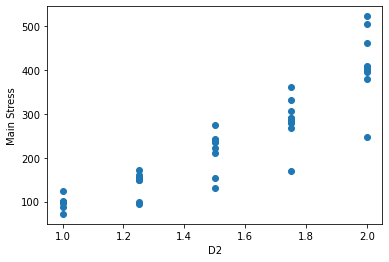

In [168]:
# plot main stress Vs impeller D2
plt.scatter(x_train_stress.D2, ym_train_stress.Sm)
plt.xlabel('D2')
plt.ylabel('Main Stress')
plt.show()

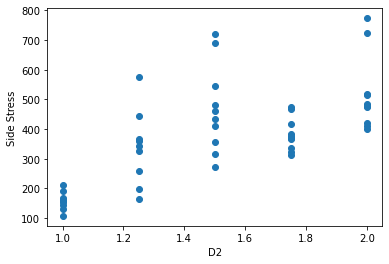

In [17]:
# plot side stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Ss)
plt.xlabel('D2')
plt.ylabel('Side Stress')
plt.show()

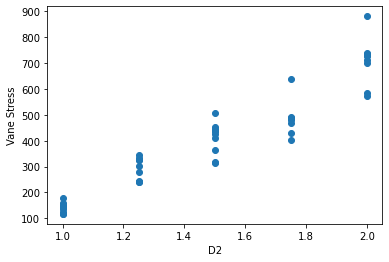

In [18]:
# plot vane stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Sv)
plt.xlabel('D2')
plt.ylabel('Vane Stress')
plt.show()

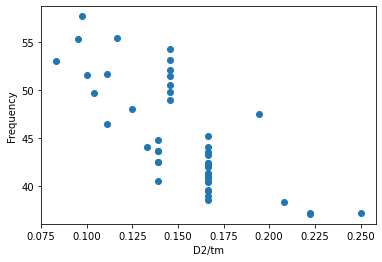

In [160]:
# plot frequency Vs D2/tm
plt.scatter(x_train_stress.D2/x_train_stress.tm,ym_train_stress.Frequency)
plt.xlabel('D2/tm')
plt.ylabel('Frequency')
plt.show()

<h2 style="color:cyan">Function for Polynominal Regression</h2>

In [79]:
df_coef = pd.DataFrame()  # To save coefficients of fitting function

def polyEstimate(x_train_sm, y_train_sm, x_test_sm, y_test_sm, order=2 ,output=1): 

    # Transform input data into polynominal features
    x_train_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_train_sm)
    x_train_sm_transform.shape  # 1, x, y, x2, xy, y2
    x_test_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_test_sm)

    # Create a linear regression model
    poly = LinearRegression()
    poly.fit(x_train_sm_transform, y_train_sm)  # transformed x data can be used as a linear regression model

    # Predict value of train data
    yhat_sm = poly.predict(x_train_sm_transform)
    yhat_test_sm = poly.predict(x_test_sm_transform)

    # Plot predict and true data
    df_result = pd.DataFrame(list(zip(y_train_sm,yhat_sm)), columns=['True_Value','Predict_Value'])
    if (output==1):
        fig = px.scatter(df_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500, title='Train data')
        fig.update_layout(margin=dict(l=10,r=10,t=20,b=10))
        fig.show()

    # Plot predict and true data
    df_test_result = pd.DataFrame(list(zip(y_test_sm,yhat_test_sm)), columns=['True_Value','Predict_Value'])
    if (output==1):
        fig2 = px.scatter(df_test_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500, title='Test data')
        fig2.update_layout(margin=dict(l=10,r=10,t=20,b=10))
        fig2.show()

    # Model Evaluation
    if (output==1):
        print("Residual sum of squares for train (MSE): %.2f" % np.mean((y_train_sm - yhat_sm) ** 2))
        print("R2-score for train: %.2f" % r2_score(y_train_sm , yhat_sm))

        print("Residual sum of squares for test (MSE): %.2f" % np.mean((y_test_sm - yhat_test_sm) ** 2))
        print("R2-score for test: %.2f" % r2_score(y_test_sm , yhat_test_sm))

        # Extract the coefficient
        columns_name = (PolynomialFeatures(degree=order).fit(x_train_sm).get_feature_names(x_train_sm.columns))
        columns_name = columns_name[1:]
        columns_name.append("Intercept")

        data = poly.coef_[1:]
        data = np.append(data, poly.intercept_).reshape(1,data.shape[0]+1)

        df_coef = pd.DataFrame(data, columns=columns_name)
        print('Coefficent shape:', df_coef.shape)
        return 0, 0
    else:
        return r2_score(y_train_sm, yhat_sm), r2_score(y_test_sm, yhat_test_sm) 

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Main Stress</h2>

In [80]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sm, x_test_stress, ym_test_stress.Sm)

Residual sum of squares for train (MSE): 289.28
R2-score for train: 0.98
Residual sum of squares for test (MSE): 875.57
R2-score for test: 0.92
Coefficent shape: (1, 15)


(0, 0)

In [178]:
df_coef.to_clipboard()

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Side stress</h2>

In [25]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Ss, x_test_stress, ym_test_stress.Ss)

Residual sum of squares for train (MSE): 903.29
R2-score for train: 0.97
Residual sum of squares for test (MSE): 994.40
R2-score for test: 0.92
Coefficent shape: (1, 15)


<h2 style="color:cyan">Polynomial Regression Model - All inputs - Vane stress</h2>

In [26]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sv, x_test_stress, ym_test_stress.Sv)

Residual sum of squares for train (MSE): 675.19
R2-score for train: 0.98
Residual sum of squares for test (MSE): 672.70
R2-score for test: 0.98
Coefficent shape: (1, 15)


<h2 style="color:cyan">Polynomial Regression Model - All inputs - Frequency</h2>

In [41]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Frequency, x_test_stress, ym_test_stress.Frequency, order=1)

Residual sum of squares for train (MSE): 12.74
R2-score for train: 0.58
Residual sum of squares for test (MSE): 24.85
R2-score for test: 0.36
Coefficent shape: (1, 5)


<h2 style="color:cyan">Weight estimation</h2>

In [28]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Weight, x_test_stress, ym_test_stress.Weight)

Residual sum of squares for train (MSE): 12.80
R2-score for train: 1.00
Residual sum of squares for test (MSE): 20.04
R2-score for test: 1.00
Coefficent shape: (1, 15)


<h2 style="color:cyan">GD2 estimation</h2>

In [29]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.GD2, x_test_stress, ym_test_stress.GD2)

Residual sum of squares for train (MSE): 38.18
R2-score for train: 1.00
Residual sum of squares for test (MSE): 90.94
R2-score for test: 0.98
Coefficent shape: (1, 15)


<h2 style="color:cyan">Frequency re-modeling</h2>

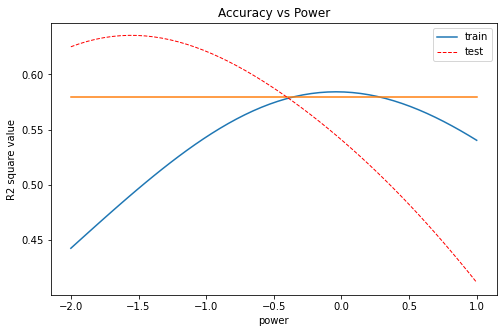

In [151]:
import math
accuracy_train = []
accuracy_test = []
x = np.linspace(-2, 1, 50)

for p in x:   

    p1 = p
    p2 = -.8
    df_freq = df_stress.copy()
    df_freq_test = df_stress_test.copy()
    df_freq['tm'] = df_freq['tm'].apply(lambda x: math.pow(x,p1))
    df_freq_test['tm'] = df_freq_test['tm'].apply(lambda x: math.pow(x,p1))
    df_freq['ts'] = df_freq['ts'].apply(lambda x: math.pow(x,1))
    df_freq_test['ts'] = df_freq_test['ts'].apply(lambda x: math.pow(x,1))
    df_freq['tv'] = df_freq['tv'].apply(lambda x: math.pow(x,1))
    df_freq_test['tv'] = df_freq_test['tv'].apply(lambda x: math.pow(x,1))
    df_freq['D2'] = df_freq['D2'].apply(lambda x: math.pow(x,p2))
    df_freq_test['D2'] = df_freq_test['D2'].apply(lambda x: math.pow(x,p2))

    # Input parameters
    x_train_freq = df_freq[['D2','tm','ts','tv']]
    x_test_freq = df_freq_test[['D2','tm','ts','tv']]

    accuracy_train1, accuracy_test1 = polyEstimate(x_train_freq, ym_train_stress.Frequency, x_test_freq, ym_test_stress.Frequency,order=1,output=0)
    accuracy_train.append(accuracy_train1)
    accuracy_test.append(accuracy_test1)
    
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x, accuracy_train, label='train')
plt.plot(x, 0.58*np.ones(50))
plt.plot(x, accuracy_test, 
         color='red',   
         linewidth=1.0,  
         linestyle='--', 
         label='test'
        )

plt.legend()
plt.xlabel("power")
plt.ylabel("R2 square value")
plt.title("Accuracy vs Power")

plt.show()

<h2 style="color:cyan">Frequency best fit model</h2>

In [156]:
p1 = -0.4
p2 = -0.8
df_freq = df_stress.copy()
df_freq_test = df_stress_test.copy()
df_freq['tm'] = df_freq['tm'].apply(lambda x: math.pow(x,p1))
df_freq_test['tm'] = df_freq_test['tm'].apply(lambda x: math.pow(x,p1))
df_freq['ts'] = df_freq['ts'].apply(lambda x: math.pow(x,1))
df_freq_test['ts'] = df_freq_test['ts'].apply(lambda x: math.pow(x,1))
df_freq['tv'] = df_freq['tv'].apply(lambda x: math.pow(x,1))
df_freq_test['tv'] = df_freq_test['tv'].apply(lambda x: math.pow(x,1))
df_freq['D2'] = df_freq['D2'].apply(lambda x: math.pow(x,p2))
df_freq_test['D2'] = df_freq_test['D2'].apply(lambda x: math.pow(x,p2))

# Input parameters
x_train_freq = df_freq[['D2','tm','ts','tv']]
x_test_freq = df_freq_test[['D2','tm','ts','tv']]

accuracy_train1, accuracy_test1 = polyEstimate(x_train_freq, ym_train_stress.Frequency, x_test_freq, ym_test_stress.Frequency,order=1,output=1)

Residual sum of squares for train (MSE): 12.76
R2-score for train: 0.58
Residual sum of squares for test (MSE): 16.24
R2-score for test: 0.58
Coefficent shape: (1, 5)


<h2 style="color:cyan">Frequency re-modeling tm/D2 model</h2>

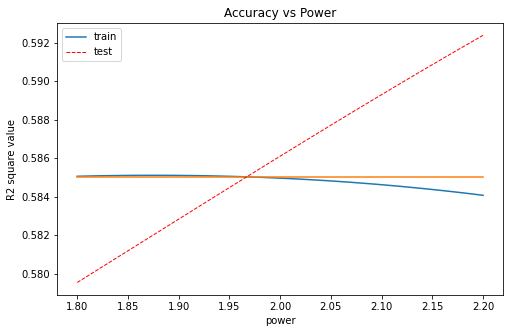

In [208]:
import math
accuracy_train = []
accuracy_test = []
x = np.linspace(1.8, 2.2, 50)

for p in x:   

    p1 = p
    p2 = 2
    df_freq = df_stress.copy()
    df_freq_test = df_stress_test.copy()
    df_freq['tm'] = df_freq['tm'] / df_freq['D2']
    df_freq_test['tm'] = df_freq_test['tm'] / df_freq_test['D2']
    df_freq['ts'] = df_freq['ts'].apply(lambda x: math.pow(x,p2))
    df_freq_test['ts'] = df_freq_test['ts'].apply(lambda x: math.pow(x,p2))
    df_freq['tv'] = df_freq['tv'].apply(lambda x: math.pow(x,p2))
    df_freq_test['tv'] = df_freq_test['tv'].apply(lambda x: math.pow(x,p2))
    df_freq['tm'] = df_freq['tm'].apply(lambda x: math.pow(x,p1))
    df_freq_test['tm'] = df_freq_test['tm'].apply(lambda x: math.pow(x,p1))

    # Input parameters
    x_train_freq = df_freq[['tm']]
    x_test_freq = df_freq_test[['tm']]

    accuracy_train1, accuracy_test1 = polyEstimate(x_train_freq, ym_train_stress.Frequency, x_test_freq, ym_test_stress.Frequency,order=2,output=0)
    accuracy_train.append(accuracy_train1)
    accuracy_test.append(accuracy_test1)
    
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x, accuracy_train, label='train')
plt.plot(x, 0.585*np.ones(50))
plt.plot(x, accuracy_test, 
         color='red',   
         linewidth=1.0,  
         linestyle='--', 
         label='test'
        )

plt.legend()
plt.xlabel("power")
plt.ylabel("R2 square value")
plt.title("Accuracy vs Power")

plt.show()

In [209]:
# Best fit model
p1 = 1.97
   
df_freq = df_stress.copy()
df_freq_test = df_stress_test.copy()
df_freq['tm'] = df_freq['tm'] / df_freq['D2']
df_freq_test['tm'] = df_freq_test['tm'] / df_freq_test['D2']
df_freq['tm'] = df_freq['tm'].apply(lambda x: math.pow(x,p1))
df_freq_test['tm'] = df_freq_test['tm'].apply(lambda x: math.pow(x,p1))

# Input parameters
x_train_freq = df_freq[['tm']]
x_test_freq = df_freq_test[['tm']]

accuracy_train1, accuracy_test1 = polyEstimate(x_train_freq, ym_train_stress.Frequency, x_test_freq, ym_test_stress.Frequency,order=2,output=1)



Residual sum of squares for train (MSE): 12.56
R2-score for train: 0.59
Residual sum of squares for test (MSE): 16.01
R2-score for test: 0.59
Coefficent shape: (1, 3)


<h2 style="color:cyan">Frequency by Rotating Speed</h2>

In [217]:
filename = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20frequency.csv'
df_fre = pd.read_csv(filename)

In [219]:
df_fre.head()

,D2,tm,a,b
0,0.755,6,1.257014,0.929486
1,1.500,9,1.362853,6.141204
2,1.000,6,1.372452,5.488837
3,2.000,12,1.198952,6.861394
4,1.750,12,1.452272,3.417123


<h3 style="color:cyan">Fitting curve: y = ax&#178 + bx with</h3>
<ul>- x: rotating frequency</ul>
<ul>- y: natural frequency</ul>

<h3 style="color:cyan">c = Y - aX&#178 - bX with</h3> 
<ul>- X: rotating frequency at standard value of 1.785</ul>
<ul>- Y: Predicted frequency at polynomial regression - all input - frequecy</ul>

In [221]:
ym_train_fre = df_fre[['a','b']]

In [275]:
polyEstimate(df_fre[['D2','tm']], ym_train_fre.a)

Residual sum of squares (MSE): 0.00
R2-score: 1.00
Coefficent shape: (1, 6)


In [276]:
polyEstimate(df_fre[['D2','tm']], ym_train_fre.b)

Residual sum of squares (MSE): 0.00
R2-score: 1.00
Coefficent shape: (1, 6)


In [ ]:
# To be continued with test data 
# Train data show very good fit with current function